# IBM Capstone Project: Looking into Location for New Restaurant

### Code Used to Solve the Problem

Importing all the Necessary Packages and Libraries for the Project

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0 --yes
import folium
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe`

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
can_df = pd.read_csv("C:\\Users\\mjone\\OneDrive\\Documents\\IBM Certification\\Capstone\\ca_postal_codes.csv")
print(can_df.head())

  Postal Code                          Place Name Province  Latitude  \
0         T0A          Eastern Alberta (St. Paul)       AB   54.7660   
1         T0B         Wainwright Region (Tofield)       AB   53.0727   
2         T0C          Central Alberta (Stettler)       AB   52.1431   
3         T0E            Western Alberta (Jasper)       AB   53.6758   
4         T0G  North Central Alberta (Slave Lake)       AB   55.6993   

   Longitude  Unnamed: 5  Unnamed: 6  
0  -111.7174         NaN         NaN  
1  -111.5816         NaN         NaN  
2  -111.6941         NaN         NaN  
3  -115.0948         NaN         NaN  
4  -114.4529         NaN         NaN  


In [3]:
montreal_data = can_df[can_df['Place Name'].str.contains("Montreal")]
montreal_data.reset_index(inplace = True)
montreal_data = montreal_data[['Postal Code', 'Place Name', 'Latitude', 'Longitude']]
print(montreal_data.shape)
print(montreal_data.head())


(10, 4)
  Postal Code                   Place Name  Latitude  Longitude
0         H1B                Montreal East   45.6320   -73.5075
1         H1G         Montreal North North   45.6109   -73.6211
2         H1H         Montreal North South   45.5899   -73.6389
3         H2Y                 Old Montreal   45.5057   -73.5550
4         H2Z  Downtown Montreal Northeast   45.5052   -73.5622


In [4]:
vancouver_data = can_df[can_df['Place Name'].str.contains("Vancouver")]
vancouver_data.reset_index(inplace = True)
vancouver_data = vancouver_data[['Postal Code', 'Place Name', 'Latitude', 'Longitude']]
print(vancouver_data.shape)
print(vancouver_data.head())

(44, 4)
  Postal Code                                         Place Name  Latitude  \
0         V5K                 Vancouver (North Hastings-Sunrise)   49.2807   
1         V5L              Vancouver (North Grandview-Woodlands)   49.2795   
2         V5M  Vancouver (South Hastings-Sunrise / North Renf...   49.2600   
3         V5N  Vancouver (South Grandview-Woodlands / NE Kens...   49.2551   
4         V5P    Vancouver (SE Kensington / Victoria-Fraserview)   49.2220   

   Longitude  
0  -123.0397  
1  -123.0667  
2  -123.0398  
3  -123.0667  
4  -123.0683  


In [5]:
calgary_data = can_df[can_df['Place Name'].str.contains("Calgary")]
calgary_data.reset_index(inplace = True)
calgary_data = calgary_data[['Postal Code', 'Place Name', 'Latitude', 'Longitude']]
print(calgary_data.shape)
print(calgary_data.head())

(35, 4)
  Postal Code                                         Place Name  Latitude  \
0         T1Y       Calgary (Rundle / Whitehorn / Monterey Park)   51.0823   
1         T2A          Calgary (Penbrooke Meadows / Marlborough)   51.0494   
2         T2B         Calgary (Forest Lawn / Dover / Erin Woods)   51.0209   
3         T2C  Calgary (Lynnwood Ridge / Ogden / Foothills In...   50.9870   
4         T2E       Calgary (Bridgeland / Greenview / Zoo / YYC)   51.0876   

   Longitude  
0  -113.9578  
1  -113.9564  
2  -113.9810  
3  -113.9634  
4  -114.0214  


In [6]:
edmonton_data = can_df[can_df['Place Name'].str.contains("Edmonton")]
edmonton_data.reset_index(inplace = True)
edmonton_data = edmonton_data[['Postal Code', 'Place Name', 'Latitude', 'Longitude']]
print(edmonton_data.shape)
print(edmonton_data.head())

(38, 4)
  Postal Code                                        Place Name  Latitude  \
0         T5A      Edmonton (West Clareview / East Londonderry)   53.5931   
1         T5B      Edmonton (East North Central / West Beverly)   53.7353   
2         T5C                    Edmonton (Central Londonderry)   53.5996   
3         T5E         Edmonton (West Londonderry / East Calder)   53.7454   
4         T5G  Edmonton (North Central / Queen Mary Park / YXD)   53.5705   

   Longitude  
0  -113.4077  
1  -113.3369  
2  -113.4549  
3  -113.4465  
4  -113.5051  


In [7]:
ottawa_data = can_df[can_df['Place Name'].str.contains("Ottawa")]
ottawa_data.reset_index(inplace = True)
ottawa_data = ottawa_data[['Postal Code', 'Place Name', 'Latitude', 'Longitude']]
print(ottawa_data.shape)
print(ottawa_data.head())

(17, 4)
  Postal Code                                        Place Name  Latitude  \
0         K1A  Government of Canada Ottawa and Gatineau offices   45.4207   
1         K1G                    Ottawa (Riverview / Hawthorne)   45.3548   
2         K1H                               Ottawa (Alta Vista)   45.3876   
3         K1K                                Ottawa (Overbrook)   45.4448   
4         K1L                                   Ottawa (Vanier)   45.4400   

   Longitude  
0   -75.7023  
1   -75.5773  
2   -75.6593  
3   -75.6431  
4   -75.6630  


In [8]:
winnipeg_data = can_df[can_df['Place Name'].str.contains("Winnipeg")]
winnipeg_data.reset_index(inplace = True)
winnipeg_data = winnipeg_data[['Postal Code', 'Place Name', 'Latitude', 'Longitude']]
print(winnipeg_data.shape)
print(winnipeg_data.head())

(33, 4)
  Postal Code                     Place Name  Latitude  Longitude
0         R2C           Winnipeg (Transcona)   49.9247   -96.9563
1         R2G    Winnipeg (River East North)   49.9413   -97.0571
2         R2H     Winnipeg (St. Boniface NW)   49.8846   -97.1186
3         R2J     Winnipeg (St. Boniface NE)   49.8665   -97.0633
4         R2K  Winnipeg (River East Central)   49.9203   -97.0830


In [9]:
toronto_data = can_df[can_df['Place Name'].str.contains("Toronto")]
toronto_data.reset_index(inplace = True)
toronto_data = toronto_data[['Postal Code', 'Place Name', 'Latitude', 'Longitude']]
print(toronto_data.shape)
print(toronto_data.head())

(41, 4)
  Postal Code                                      Place Name  Latitude  \
0         M3K                    Downsview East (CFB Toronto)   43.7390   
1         M4E                      East Toronto (The Beaches)   43.6784   
2         M4J                East Toronto (The Danforth East)   43.6872   
3         M4K    East Toronto (The Danforth West / Riverdale)   43.6803   
4         M4L  East Toronto (India Bazaar / The Beaches West)   43.6693   

   Longitude  
0   -79.4692  
1   -79.2941  
2   -79.3368  
3   -79.3538  
4   -79.3155  


In [10]:
city_list = [toronto_data, montreal_data, vancouver_data, calgary_data, edmonton_data, ottawa_data, winnipeg_data]
total_data = pd.concat(city_list)
total_data.reset_index(inplace = True)
total_data = total_data[['Postal Code', 'Place Name', 'Latitude', 'Longitude']]
print(total_data.shape)
print(total_data.head())

(218, 4)
  Postal Code                                      Place Name  Latitude  \
0         M3K                    Downsview East (CFB Toronto)   43.7390   
1         M4E                      East Toronto (The Beaches)   43.6784   
2         M4J                East Toronto (The Danforth East)   43.6872   
3         M4K    East Toronto (The Danforth West / Riverdale)   43.6803   
4         M4L  East Toronto (India Bazaar / The Beaches West)   43.6693   

   Longitude  
0   -79.4692  
1   -79.2941  
2   -79.3368  
3   -79.3538  
4   -79.3155  


In [11]:
address = 'Canada'

geolocator = Nominatim(user_agent="canada_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Canada are {}, {}.'.format(latitude, longitude))

map_canada = folium.Map(location=[latitude, longitude], zoom_start=3)

# add markers to map
for lat, lng, place in zip(total_data['Latitude'], total_data['Longitude'], total_data['Place Name']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_canada)  
    
map_canada

The geograpical coordinate of Canada are 61.0666922, -107.991707.


In [12]:
lat_rest = toronto_data[toronto_data['Place Name']=='Central Toronto (Lawrence Park East)']['Latitude'] 
long_rest = toronto_data[toronto_data['Place Name']=='Central Toronto (Lawrence Park East)']['Longitude'] 

address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, place in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Place Name']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

folium.Marker([lat_rest, long_rest], popup='Location of Restaurant').add_to(map_toronto)
    
map_toronto

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [13]:
address = 'Montreal, QC'

geolocator = Nominatim(user_agent="montreal_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Montreal are {}, {}.'.format(latitude, longitude))

map_montreal = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, place in zip(montreal_data['Latitude'], montreal_data['Longitude'], montreal_data['Place Name']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_montreal)  
    
map_montreal

The geograpical coordinate of Montreal are 45.4972159, -73.6103642.


In [14]:
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="vancouver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

map_vancouver = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, place in zip(vancouver_data['Latitude'], vancouver_data['Longitude'], vancouver_data['Place Name']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [15]:
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="calgary_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

map_calgary = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, place in zip(calgary_data['Latitude'], calgary_data['Longitude'], calgary_data['Place Name']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


In [16]:
address = 'Edmonton, AB'

geolocator = Nominatim(user_agent="edmonton_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Edmonton are {}, {}.'.format(latitude, longitude))

map_edmonton = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, place in zip(edmonton_data['Latitude'], edmonton_data['Longitude'], edmonton_data['Place Name']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_edmonton)  
    
map_edmonton

The geograpical coordinate of Edmonton are 53.535411, -113.507996.


In [17]:
address = 'Ottawa, ON'

geolocator = Nominatim(user_agent="ottawa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

map_ottawa = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, place in zip(ottawa_data['Latitude'], ottawa_data['Longitude'], ottawa_data['Place Name']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ottawa)  
    
map_ottawa

The geograpical coordinate of Toronto are 45.421106, -75.690308.


In [18]:
address = 'Winnipeg, MB'

geolocator = Nominatim(user_agent="winnipeg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Winnipeg are {}, {}.'.format(latitude, longitude))

map_winnipeg = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, place in zip(winnipeg_data['Latitude'], winnipeg_data['Longitude'], winnipeg_data['Place Name']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_winnipeg)  
    
map_winnipeg

The geograpical coordinate of Winnipeg are 49.8955367, -97.1384584.


In [19]:
CLIENT_ID = 'XPJTDFM42FI1JD2URLXLHEZYOPALKXEGUCDB5EH0WCYR2OMH' 
CLIENT_SECRET = 'ZGIBVGWVBK04HKSZUW4TWET4OBPLYY10L5IU15ENM01NRJLP' 
VERSION = '20180605' 
LIMIT = 50

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)   
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
canada_venues = getNearbyVenues(names = total_data['Place Name'],
                                  latitudes = total_data['Latitude'],
                                  longitudes = total_data['Longitude'])

Downsview East (CFB Toronto)
East Toronto (The Beaches)
East Toronto (The Danforth East)
East Toronto (The Danforth West / Riverdale)
East Toronto (India Bazaar / The Beaches West)
East Toronto (Studio District)
Central Toronto (Lawrence Park East)
Central Toronto (Davisville North)
Central Toronto (North Toronto West)
Central Toronto (Davisville)
Central Toronto (Moore Park / Summerhill East)
Central Toronto (Summerhill West / Rathnelly / South Hill / Forest Hill SE / Deer Park)
Downtown Toronto (Rosedale)
Downtown Toronto (St. James Town / Cabbagetown)
Downtown Toronto (Church and Wellesley)
Downtown Toronto (Regent Park / Port of Toronto)
Downtown Toronto (Ryerson)
Downtown Toronto (St. James Park)
Downtown Toronto (Berczy Park)
Downtown Toronto (Central Bay Street)
Downtown Toronto (Richmond / Adelaide / King)
Downtown Toronto (Harbourfront East / Union Station / Toronto Island)
Downtown Toronto (Toronto Dominion Centre / Design Exchange)
Downtown Toronto (Commerce Court / Victoria

Winnipeg (St. James-Assiniboia NE / YWG)
Winnipeg (St. James-Assiniboia SE)
Winnipeg (St. James-Assiniboia SW)
Winnipeg (River Heights East)
Winnipeg (River Heights Central)
Winnipeg (River Heights West)
Winnipeg (Fort Garry NW / Tuxedo)
Winnipeg (Assiniboine South / Betsworth)
Winnipeg (Wilkes South)
Winnipeg (Fort Garry NE / University of Manitoba)
Winnipeg (Fort Garry South)
Winnipeg (Grassie / Pequis)
Winnipeg (St. Boniface South / St. Vital SE)
Winnipeg (Fort Garry West)


In [22]:
canada_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Calgary (Brentwood / Collingwood / Nose Hill),4,4,4,4,4,4
Calgary (Bridgeland / Greenview / Zoo / YYC),9,9,9,9,9,9
Calgary (City Centre / Calgary Tower),1,1,1,1,1,1
Calgary (Connaught / West Victoria Park),50,50,50,50,50,50
Calgary (Cranston),20,20,20,20,20,20
...,...,...,...,...,...,...
Winnipeg (St. James-Assiniboia NE / YWG),32,32,32,32,32,32
Winnipeg (St. James-Assiniboia SE),4,4,4,4,4,4
Winnipeg (St. James-Assiniboia SW),4,4,4,4,4,4


In [23]:
canada_onehot = pd.get_dummies(canada_venues[['Venue Category']], prefix="", prefix_sep="")

canada_onehot['Neighborhood'] = canada_venues['Neighborhood'] 

fixed_columns = [canada_onehot.columns[-1]] + list(canada_onehot.columns[:-1])
canada_onehot = canada_onehot[fixed_columns]

canada_onehot.head()

,Zoo Exhibit,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Warehouse,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
canada_grouped = canada_onehot.groupby('Neighborhood').mean().reset_index()

canada_grouped.head()

,Neighborhood,Zoo Exhibit,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Warehouse,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Calgary (Brentwood / Collingwood / Nose Hill),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,Calgary (Bridgeland / Greenview / Zoo / YYC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,Calgary (City Centre / Calgary Tower),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,Calgary (Connaught / West Victoria Park),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.02
4,Calgary (Cranston),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [52]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = canada_grouped['Neighborhood']

for ind in np.arange(canada_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(canada_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'] =='Downtown Toronto (Rosedale)']
rose_top = ['Park', 'Trail', 'Playground', 'Grocery Store', 'Candy Store', 'Café', 'Historic Site', 'Scenic Lookout', 'Farmers Market', 'Gym / Fitness Center']
for venue in rose_top:
    print(canada_grouped[canada_grouped['Neighborhood'] =='Downtown Toronto (Rosedale)'][venue])

53    0.294118
Name: Park, dtype: float64
53    0.117647
Name: Trail, dtype: float64
53    0.058824
Name: Playground, dtype: float64
53    0.058824
Name: Grocery Store, dtype: float64
53    0.058824
Name: Candy Store, dtype: float64
53    0.058824
Name: Café, dtype: float64
53    0.058824
Name: Historic Site, dtype: float64
53    0.058824
Name: Scenic Lookout, dtype: float64
53    0.058824
Name: Farmers Market, dtype: float64
53    0.058824
Name: Gym / Fitness Center, dtype: float64


In [49]:
canada_grouped_clustering = canada_grouped.drop('Neighborhood', 1)
canada_grouped_clustering.shape

(201, 388)

In [28]:
np.random.seed(10)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 15)
 
for k in K:

    kmeanModel = KMeans(n_clusters=k).fit(canada_grouped_clustering)
    kmeanModel.fit(canada_grouped_clustering)
 
    distortions.append(sum(np.min(cdist(canada_grouped_clustering, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / canada_grouped_clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(canada_grouped_clustering, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / canada_grouped_clustering.shape[0]
    mapping2[k] = kmeanModel.inertia_

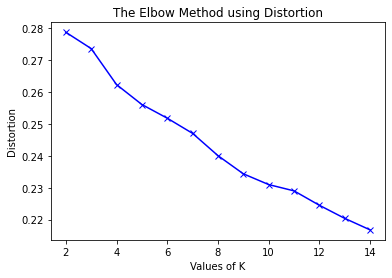

In [29]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

For n_clusters = 2, silhouette score is 0.6115167078489387)
For n_clusters = 3, silhouette score is 0.4609067829914005)
For n_clusters = 4, silhouette score is 0.44316888029392143)
For n_clusters = 5, silhouette score is 0.5639506213609526)
For n_clusters = 6, silhouette score is 0.4399651366905745)
For n_clusters = 7, silhouette score is 0.22600026693002345)
For n_clusters = 8, silhouette score is 0.44414898678202536)
For n_clusters = 9, silhouette score is 0.4096436715680666)
For n_clusters = 10, silhouette score is 0.15323351810923946)
For n_clusters = 11, silhouette score is 0.058143491393474765)
For n_clusters = 12, silhouette score is 0.13628561261297611)
For n_clusters = 13, silhouette score is 0.0818647711969929)
For n_clusters = 14, silhouette score is 0.07101476425168124)


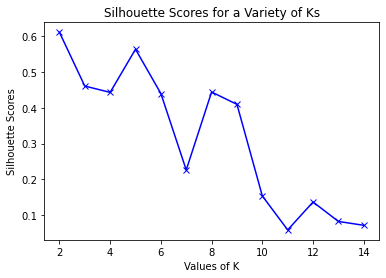

In [30]:
np.random.seed(10)
sil_scores = []
for k in K:
    clusterer = KMeans(n_clusters=k)
    preds = clusterer.fit_predict(canada_grouped_clustering)
    centers = clusterer.cluster_centers_

    score = silhouette_score(canada_grouped_clustering, preds)
    sil_scores.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(k, score))
    
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores for a Variety of Ks')
plt.show()

In [31]:
kclusters = 5


kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(canada_grouped_clustering)

kmeans.labels_[0:25] 

array([2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1])

In [32]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [33]:
canada_merged = total_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
canada_merged = canada_merged.merge( neighborhoods_venues_sorted.set_index('Neighborhood'), how = 'left', left_on = 'Place Name',right_on='Neighborhood')

canada_merged # check the last columns!
canada_merged.dropna(axis=0, inplace=True)
canada_merged

,Postal Code,Place Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3K,Downsview East (CFB Toronto),43.7390,-79.4692,0.0,Athletics & Sports,Turkish Restaurant,Racetrack,Italian Restaurant,Go Kart Track,Bakery,Park,Chinese Restaurant,Gym / Fitness Center,Sandwich Place
1,M4E,East Toronto (The Beaches),43.6784,-79.2941,0.0,Pub,Coffee Shop,Pizza Place,Japanese Restaurant,Bar,Breakfast Spot,Burger Joint,Caribbean Restaurant,Sandwich Place,Bagel Shop
2,M4J,East Toronto (The Danforth East),43.6872,-79.3368,0.0,Café,Coffee Shop,Bakery,Ethiopian Restaurant,American Restaurant,Greek Restaurant,Gastropub,Pharmacy,Beer Bar,Hostel
3,M4K,East Toronto (The Danforth West / Riverdale),43.6803,-79.3538,0.0,Greek Restaurant,Yoga Studio,Pub,Bakery,Coffee Shop,Ice Cream Shop,Italian Restaurant,Cuban Restaurant,Cocktail Bar,Donut Shop
4,M4L,East Toronto (India Bazaar / The Beaches West),43.6693,-79.3155,0.0,Restaurant,Coffee Shop,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Park,Café,Beach,Brewery,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,R3T,Winnipeg (Fort Garry NE / University of Manitoba),49.8143,-97.1531,0.0,Fast Food Restaurant,Chinese Restaurant,Sandwich Place,Asian Restaurant,Department Store,Pizza Place,Grocery Store,Toy / Game Store,Mobile Phone Shop,Nightclub
214,R3V,Winnipeg (Fort Garry South),49.7462,-97.1745,0.0,Construction & Landscaping,Athletics & Sports,Baseball Field,Yoga Studio,Fish Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
215,R3W,Winnipeg (Grassie / Pequis),49.9141,-97.0401,2.0,Park,Grocery Store,Yoga Studio,Event Space,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
216,R3X,Winnipeg (St. Boniface South / St. Vital SE),49.8209,-97.0322,0.0,Liquor Store,Gym,Yoga Studio,Financial or Legal Service,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


In [53]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

toronto_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(canada_merged['Latitude'], canada_merged['Longitude'], canada_merged['Place Name'], canada_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(toronto_clusters)
       
toronto_clusters

In [35]:
address = 'Montreal, QC'

geolocator = Nominatim(user_agent="quebec_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

quebec_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(canada_merged['Latitude'], canada_merged['Longitude'], canada_merged['Place Name'], canada_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(quebec_clusters)
       
quebec_clusters

In [36]:
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="vancouver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

vancouver_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(canada_merged['Latitude'], canada_merged['Longitude'], canada_merged['Place Name'], canada_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(vancouver_clusters)
       
vancouver_clusters

In [37]:
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="calgary_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

calgary_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

markers_colors = []
for lat, lon, poi, cluster in zip(canada_merged['Latitude'], canada_merged['Longitude'], canada_merged['Place Name'], canada_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(calgary_clusters)
       
calgary_clusters

In [38]:
address = 'Edmonton, AB'

geolocator = Nominatim(user_agent="edmonton_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

edmonton_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

markers_colors = []
for lat, lon, poi, cluster in zip(canada_merged['Latitude'], canada_merged['Longitude'], canada_merged['Place Name'], canada_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(edmonton_clusters)
       
edmonton_clusters

In [39]:
address = 'Ottawa, ON'

geolocator = Nominatim(user_agent="ottawa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

ottawa_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

markers_colors = []
for lat, lon, poi, cluster in zip(canada_merged['Latitude'], canada_merged['Longitude'], canada_merged['Place Name'], canada_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(ottawa_clusters)
       
ottawa_clusters

In [40]:
address = 'Winnipeg, MB'

geolocator = Nominatim(user_agent="winnipeg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

winnipeg_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

markers_colors = []
for lat, lon, poi, cluster in zip(canada_merged['Latitude'], canada_merged['Longitude'], canada_merged['Place Name'], canada_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(winnipeg_clusters)
       
winnipeg_clusters

In [41]:
canada_merged.loc[canada_merged['Cluster Labels'] == 0, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downsview East (CFB Toronto),Athletics & Sports,Turkish Restaurant,Racetrack,Italian Restaurant,Go Kart Track,Bakery,Park,Chinese Restaurant,Gym / Fitness Center,Sandwich Place
1,East Toronto (The Beaches),Pub,Coffee Shop,Pizza Place,Japanese Restaurant,Bar,Breakfast Spot,Burger Joint,Caribbean Restaurant,Sandwich Place,Bagel Shop
2,East Toronto (The Danforth East),Café,Coffee Shop,Bakery,Ethiopian Restaurant,American Restaurant,Greek Restaurant,Gastropub,Pharmacy,Beer Bar,Hostel
3,East Toronto (The Danforth West / Riverdale),Greek Restaurant,Yoga Studio,Pub,Bakery,Coffee Shop,Ice Cream Shop,Italian Restaurant,Cuban Restaurant,Cocktail Bar,Donut Shop
4,East Toronto (India Bazaar / The Beaches West),Restaurant,Coffee Shop,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Park,Café,Beach,Brewery,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
211,Winnipeg (Assiniboine South / Betsworth),Construction & Landscaping,Coffee Shop,Market,Pizza Place,Fish & Chips Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
213,Winnipeg (Fort Garry NE / University of Manitoba),Fast Food Restaurant,Chinese Restaurant,Sandwich Place,Asian Restaurant,Department Store,Pizza Place,Grocery Store,Toy / Game Store,Mobile Phone Shop,Nightclub
214,Winnipeg (Fort Garry South),Construction & Landscaping,Athletics & Sports,Baseball Field,Yoga Studio,Fish Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
216,Winnipeg (St. Boniface South / St. Vital SE),Liquor Store,Gym,Yoga Studio,Financial or Legal Service,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


In [42]:
canada_merged.loc[canada_merged['Cluster Labels'] == 1, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
127,Calgary (Symons Valley),Home Service,Yoga Studio,Fish & Chips Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
192,Winnipeg (St. Vital SW),Home Service,Yoga Studio,Fish & Chips Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field


In [43]:
canada_merged.loc[canada_merged['Cluster Labels'] == 2, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Downtown Toronto (Rosedale),Park,Trail,Playground,Grocery Store,Candy Store,Café,Historic Site,Scenic Lookout,Farmers Market,Gym / Fitness Center
77,Vancouver (Chaldecutt / South University Endow...,Park,Restaurant,Trail,Scenic Lookout,Filipino Restaurant,Event Space,Factory,Fair,Falafel Restaurant,Farm
82,North Vancouver East Central,Trail,Rock Climbing Spot,Lake,Yoga Studio,Fish & Chips Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market
83,North Vancouver North Central,Trail,Mountain,Scenic Lookout,Yoga Studio,Financial or Legal Service,Factory,Fair,Falafel Restaurant,Farm,Farmers Market
86,North Vancouver Northwest Central,Trail,Construction & Landscaping,Paper / Office Supplies Store,Scenic Lookout,Filipino Restaurant,Factory,Fair,Falafel Restaurant,Farm,Farmers Market
88,North Vancouver Northwest,Trail,Scenic Lookout,Ski Chalet,Restaurant,Movie Theater,Coffee Shop,Mountain,Ski Trail,Ski Chairlift,Fast Food Restaurant
89,West Vancouver North,Café,Ski Area,Trail,Scenic Lookout,Ski Lodge,Yoga Studio,Ethiopian Restaurant,Factory,Fair,Falafel Restaurant
92,West Vancouver West,Harbor / Marina,Trail,Tapas Restaurant,Football Stadium,Food Truck,Factory,Fair,Falafel Restaurant,Farm,Fountain
104,Calgary (Brentwood / Collingwood / Nose Hill),Scenic Lookout,Tourist Information Center,Lake,Yoga Studio,Financial or Legal Service,Factory,Fair,Falafel Restaurant,Farm,Farmers Market
173,Ottawa (Rockcliffe Park / New Edinburgh),Playground,Restaurant,Historic Site,Scenic Lookout,Park,Sports Club,Food Court,Food & Drink Shop,Ethiopian Restaurant,Event Space


In [44]:
canada_merged.loc[canada_merged['Cluster Labels'] == 3, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
145,Edmonton (Central Mistatim),Yoga Studio,Construction & Landscaping,Fish Market,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
159,Edmonton Southwest,Construction & Landscaping,Yoga Studio,Fish Market,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant


In [45]:
canada_merged.loc[canada_merged['Cluster Labels'] == 4, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

,Place Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
107,Calgary (City Centre / Calgary Tower),Business Service,Yoga Studio,Frozen Yogurt Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
143,Edmonton (West Northwest Industrial / Winterburn),Business Service,Yoga Studio,Frozen Yogurt Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant


In [46]:
solution_cluster = canada_merged[canada_merged['Place Name']=='Downtown Toronto (Rosedale)']['Cluster Labels']
solution_cluster

12    2.0
Name: Cluster Labels, dtype: float64

In [47]:
solution_set = canada_merged[canada_merged['Cluster Labels'] == 2]['Place Name']
print(solution_set)

12                           Downtown Toronto (Rosedale)
77     Vancouver (Chaldecutt / South University Endow...
82                          North Vancouver East Central
83                         North Vancouver North Central
86                     North Vancouver Northwest Central
88                             North Vancouver Northwest
89                                  West Vancouver North
92                                   West Vancouver West
104        Calgary (Brentwood / Collingwood / Nose Hill)
173             Ottawa (Rockcliffe Park / New Edinburgh)
193                           Winnipeg (Seven Oaks West)
194                              Winnipeg (Inkster West)
205                   Winnipeg (St. James-Assiniboia SE)
215                          Winnipeg (Grassie / Pequis)
Name: Place Name, dtype: object
